Predicting NBA Finals

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import seaborn as sns

# Important Factors:
    Record, Points Scored, Offensive and Defensive efficiency 

In [3]:
#player_stats = player_stats_extra.drop(columns = ["Rk","Player","Age","Pos"])
#player_stats_extra = pd.read_csv("Try this one.csv", skiprows = 1)
team_playoff_stats_all_time = pd.read_csv("nba_team_stats_playoffs_00_to_21.csv")
team_stats_all_time = pd.read_csv("nba_team_stats_00_to_21.csv")



In [4]:
#Reading in all datasets to use:
team_stats_2022_2023 = pd.read_csv("NBA Stats 202223 Team Metrics Away-Home-Last 5 Splits.csv")


In [5]:
team_stats_all_time.corr()['W']
#FG%, 3P%, TOV, BLKA, '+/-'

teamstatspk    0.082478
GP             0.296596
W              1.000000
L             -0.837092
WIN%           0.956054
MIN           -0.016304
PTS            0.226926
FGM            0.194658
FGA           -0.155489
FG%            0.548617
3PM            0.068412
3PA           -0.005666
3P%            0.483844
FTM            0.217744
FTA            0.177553
FT%            0.114896
OREB          -0.101195
DREB           0.217792
REB            0.169930
AST            0.245572
TOV           -0.319976
STL            0.146408
BLK            0.252614
BLKA          -0.423922
PF            -0.138315
PFD           -0.033502
+/-            0.926433
Name: W, dtype: float64

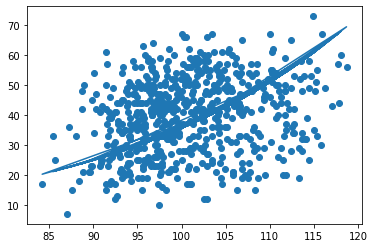

In [6]:
#define an exponential, quadratic, and linear function to test each correlation for the different plots

def exp(x, a, b):
    
    return a**(x*b)

def quad(x, a, b, c):
    
    return a*x**2 + b*x + c

def linear(x, a, b):
    
    return a*x + b

#find each best fit parameters for the different stats, then plot this based on which model fit the best
best_fit_parameters, just_ignore_this = curve_fit(exp, team_stats_all_time['PTS'], team_stats_all_time['W'])

exp_fit = exp(team_stats_all_time['PTS'], best_fit_parameters[0], best_fit_parameters[1])

plt.scatter(team_stats_all_time['PTS'], team_stats_all_time['W'])
plt.plot(team_stats_all_time['PTS'], exp_fit)

Text(0, 0.5, 'Wins')

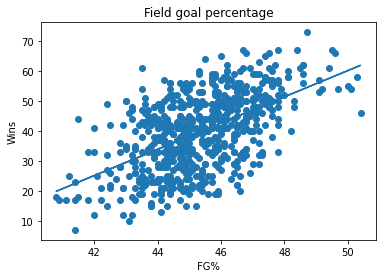

In [7]:
#continue to do the above curve fitting for each relationship we had found and plot them
best_fit_parameters, just_ignore_this = curve_fit(linear, team_stats_all_time['FG%'], team_stats_all_time['W'])
lin_fit = linear(team_stats_all_time['FG%'], best_fit_parameters[0], best_fit_parameters[1])

plt.plot(team_stats_all_time['FG%'], lin_fit)
plt.scatter(team_stats_all_time['FG%'], team_stats_all_time['W'])
plt.title('Field goal percentage')
plt.xlabel('FG%')
plt.ylabel('Wins')


Text(0, 0.5, 'Wins')

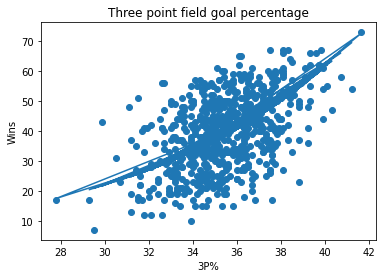

In [8]:
best_fit_parameters, just_ignore_this = curve_fit(exp, team_stats_all_time['3P%'], team_stats_all_time['W'])
exp_fit = exp(team_stats_all_time['3P%'], best_fit_parameters[0], best_fit_parameters[1])

plt.plot(team_stats_all_time['3P%'], exp_fit)
plt.scatter(team_stats_all_time['3P%'], team_stats_all_time['W'])
plt.title('Three point field goal percentage')
plt.xlabel('3P%')
plt.ylabel('Wins')

Text(0, 0.5, 'Wins')

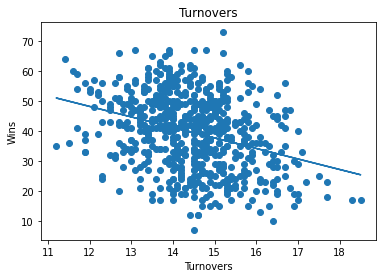

In [9]:
best_fit_parameters, just_ignore_this = curve_fit(linear, team_stats_all_time['TOV'], team_stats_all_time['W'])
lin_fit = linear(team_stats_all_time['TOV'], best_fit_parameters[0], best_fit_parameters[1])

plt.plot(team_stats_all_time['TOV'], lin_fit)
plt.scatter(team_stats_all_time['TOV'], team_stats_all_time['W'])
plt.title('Turnovers')
plt.xlabel('Turnovers')
plt.ylabel('Wins')

Text(0, 0.5, 'Wins')

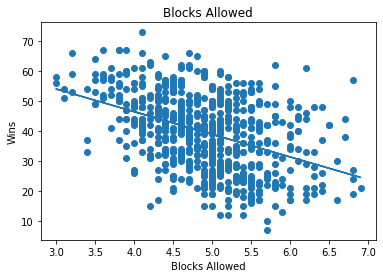

In [10]:
best_fit_parameters, just_ignore_this = curve_fit(linear, team_stats_all_time['BLKA'], team_stats_all_time['W'])
lin_fit = linear(team_stats_all_time['BLKA'], best_fit_parameters[0], best_fit_parameters[1])

plt.plot(team_stats_all_time['BLKA'], lin_fit)
plt.scatter(team_stats_all_time['BLKA'], team_stats_all_time['W'])
plt.title('Blocks Allowed')
plt.xlabel('Blocks Allowed')
plt.ylabel('Wins')

Text(0, 0.5, 'Wins')

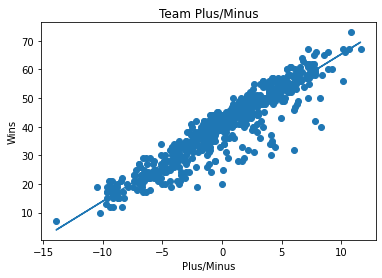

In [11]:
best_fit_parameters, just_ignore_this = curve_fit(linear, team_stats_all_time['+/-'], team_stats_all_time['W'])
lin_fit = linear(team_stats_all_time['+/-'], best_fit_parameters[0], best_fit_parameters[1])

plt.plot(team_stats_all_time['+/-'], lin_fit)
plt.scatter(team_stats_all_time['+/-'], team_stats_all_time['W'])
plt.title('Team Plus/Minus')
plt.xlabel('Plus/Minus')
plt.ylabel('Wins')

In [12]:
team_stats_2022_2023

RANK           TEAM  CONF   DIVISION  GP    PPG   oPPG  pDIFF   PACE  \
0      1      Milwaukee  East    Central  75  116.8  112.4    4.4  100.5   
1      2         Boston  East   Atlantic  75  118.1  111.7    6.4   98.4   
2      3   Philadelphia  East   Atlantic  75  115.2  110.6    4.6   96.9   
3      4      Cleveland  East    Central  76  112.2  106.5    5.7   95.4   
4      5       New York  East   Atlantic  76  115.6  112.8    2.8   96.9   
5      6       Brooklyn  East   Atlantic  75  113.4  112.8    0.6   98.3   
6      7          Miami  East  Southeast  75  109.1  109.9   -0.8   96.2   
7      8        Atlanta  East  Southeast  75  118.0  117.8    0.2  100.7   
8      9        Toronto  East   Atlantic  75  113.0  111.9    1.1   97.3   
9     10        Chicago  East    Central  75  113.4  112.4    1.0   98.5   
10    11     Washington  East  Southeast  75  112.9  113.8   -0.9   98.0   
11    12        Indiana  East    Central  76  115.6  118.7   -3.1  100.6   
12    13        Orlando  East  Southeast  75  111.8  114.2   -2.4   99.1   
13    14      Charlotte  East  Southeast  76  111.1  117.1   -6.0  100.8   
14    15        Detroit  East    Central  75  110.7  118.7   -8.0   99.2   
15    16         Denver  West  Northwest  75  116.8  112.7    4.1   98.1   
16    17        Memphis  West  Southwest  74  116.8  112.4    4.4  100.9   
17    18     Sacramento  West    Pacific  75  121.0  118.5    2.5  100.3   
18    19        Phoenix  West    Pacific  75  113.7  111.9    1.8   98.2   
19    20    LA Clippers  West    Pacific  76  113.0  112.6    0.4   97.7   
20    21   Golden State  West    Pacific  76  118.2  117.7    0.5  101.7   
21    22      Minnesota  West  Northwest  76  115.9  116.0   -0.1  101.0   
22    23    New Orleans  West  Southwest  75  114.4  112.4    2.0   99.2   
23    24      LA Lakers  West    Pacific  75  116.4  116.7   -0.3  101.3   
24    25  Oklahoma City  West  Northwest  75  117.4  116.2    1.2  101.0   
25    26         Dallas  West  Southwest  76  113.9  113.3    0.6   96.2   
26    27           Utah  West  Northwest  75  117.1  117.9   -0.8  100.2   
27    28       Portland  West  Northwest  75  113.8  116.3   -2.5   98.1   
28    29    San Antonio  West  Southwest  75  112.0  122.5  -10.5  101.3   
29    30        Houston  West  Southwest  76  110.4  118.8   -8.4   98.9   

     oEFF  ...   SAR  CONS    A4F   W   L   WIN%  eWIN%  pWIN%    ACH  STRK  
0   115.3  ...  3.81  14.1  0.089  54  21  0.720  0.622  0.645  0.098     1  
1   118.0  ...  5.32  14.0  0.060  52  23  0.693  0.673  0.711  0.020     3  
2   117.7  ...  4.70  12.9  0.022  49  26  0.653  0.642  0.651  0.011    -3  
3   116.3  ...  4.89  12.9  0.005  48  28  0.632  0.676  0.688 -0.044     4  
4   117.5  ...  2.74  13.2  0.023  43  33  0.566  0.584  0.592 -0.018     1  
5   115.0  ...  0.88  15.5  0.036  40  35  0.533  0.515  0.520  0.018    -1  
6   112.7  ... -0.87  11.4 -0.075  40  35  0.533  0.472  0.474  0.061    -1  
7   116.5  ...  0.66  13.0 -0.029  37  38  0.493  0.506  0.507 -0.013    -1  
8   115.4  ...  0.72  12.2 -0.118  37  38  0.493  0.539  0.536 -0.046     2  
9   113.6  ...  1.20  14.6 -0.003  36  39  0.480  0.525  0.533 -0.045    -1  
10  114.7  ... -0.59  13.4  0.041  33  42  0.440  0.473  0.470 -0.033    -1  
11  114.4  ... -2.92  11.1 -0.028  33  43  0.434  0.393  0.398  0.041    -3  
12  112.1  ... -1.43  11.7 -0.017  32  43  0.427  0.419  0.421  0.008     3  
13  109.4  ... -4.69  12.8 -0.054  25  51  0.329  0.322  0.302  0.007     2  
14  110.8  ... -6.99  12.4 -0.045  16  59  0.213  0.259  0.237 -0.046    -6  
15  118.6  ...  3.68  14.2  0.065  51  24  0.680  0.619  0.635  0.061     4  
16  115.2  ...  3.65  14.7  0.007  47  27  0.635  0.615  0.645  0.020     6  
17  119.6  ...  1.95  12.5  0.009  45  30  0.600  0.576  0.582  0.024    -1  
18  115.2  ...  2.47  15.6 -0.001  40  35  0.533  0.548  0.559 -0.015     2  
19  114.7  ...  0.19  13.8  0.024  40  36  0.526  0.512  0.513  0.014     1  
20  115.4

In [13]:
#create a list of the unique seasons
years = list(team_stats_all_time['SEASON'].unique())
years.reverse()

#created a list in order of the championship series for each season in our dataframe
champions = ['Los Angeles Lakers', 'Los Angeles Lakers', 'San Antonio Spurs', 'Detroit Pistons', 'San Antonio Spurs', 'Miami Heat', 'San Antonio Spurs', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Dallas Mavericks', 'Miami Heat', 'Miami Heat', 'San Antonio Spurs', 'Golden State Warriors', 'Cleveland Cavaliers', 'Golden State Warriors', 'Golden State Warriors', 'Toronto Raptors', 'Los Angeles Lakers', 'Milwaukee Bucks']
championship = ['Los Angeles Lakers', 'Philadelphia 76ers', 'Los Angeles Lakers', 'New Jersey Nets', 'San Antonio Spurs', 'New Jersey Nets', 'Detroit Pistons', 'Los Angeles Lakers', 'San Antonio Spurs', 'Detroit Pistons', 'Miami Heat', 'Dallas Mavericks', 'San Antonio Spurs', 'Cleveland Cavaliers', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Orlando Magic', 'Los Angeles Lakers', 'Boston Celtics', 'Dallas Mavericks', 'Miami Heat', 'Miami Heat', 'Oklahoma City Thunder', 'Miami Heat', 'San Antonio Spurs', 'San Antonio Spurs', 'Miami Heat', 'Golden State Warriors', 'Cleveland Cavaliers', 'Cleveland Cavaliers', 'Golden State Warriors', 'Golden State Warriors', 'Cleveland Cavaliers', 'Golden State Warriors', 'Cleveland Cavaliers', 'Toronto Raptors', 'Golden State Warriors', 'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks', 'Phoenix Suns']

num = 0
ind = 0
championshipdf = pd.DataFrame()

#loop through current dataframe and remove the teams season from that and add it to a new dataframe of only the teams that played in the champnionship that season
while num <= 41:
    
    year = years[ind]
    team = championship[num]
    
    mask = team_stats_all_time['SEASON'] == year
    mask2 = team_stats_all_time['TEAM'] == team
    
    championshipdf = championshipdf.append(team_stats_all_time[mask][mask2])
    row = team_stats_all_time.index[(team_stats_all_time['SEASON']==year) & (team_stats_all_time['TEAM']==team)].tolist()
    team_stats_all_time = team_stats_all_time.drop(team_stats_all_time.index[row])

    num +=1
    
    team = championship[num]
    mask2 = team_stats_all_time['TEAM'] == team
    
    championshipdf = championshipdf.append(team_stats_all_time[mask][mask2])
    row = team_stats_all_time.index[(team_stats_all_time['SEASON']==year) & (team_stats_all_time['TEAM']==team)].tolist()
    team_stats_all_time = team_stats_all_time.drop(team_stats_all_time.index[row])
    
    num+=1
    ind +=1

<ipython-input-13-bd7adc51b822>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  championshipdf = championshipdf.append(team_stats_all_time[mask][mask2])
<ipython-input-13-bd7adc51b822>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  championshipdf = championshipdf.append(team_stats_all_time[mask][mask2])


In [14]:
team_stats_all_time

teamstatspk                   TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
1              1  Golden State Warriors  53  40  13  0.755  48.2  110.9  40.4   
2              2      Memphis Grizzlies  55  37  18  0.673  48.3  112.7  42.7   
3              3             Miami Heat  54  34  20  0.630  48.5  108.7  39.3   
4              4          Chicago Bulls  53  33  20  0.623  48.1  111.6  41.6   
6              6    Cleveland Cavaliers  54  33  21  0.611  48.0  106.5  39.5   
..           ...                    ...  ..  ..  ..    ...   ...    ...   ...   
621          621          Atlanta Hawks  82  25  57  0.305  48.1   91.0  35.1   
622          622    Vancouver Grizzlies  82  23  59  0.280  48.2   91.7  35.0   
623          623     Washington Wizards  82  19  63  0.232  48.0   93.2  34.5   
624          624  Golden State Warriors  82  17  65  0.207  48.2   92.5  35.8   
625          625          Chicago Bulls  82  15  67  0.183  48.4   87.6  33.2   

      FGA  ...   REB   AST   TOV   STL  BLK  BLKA    PF   PFD  +/-   SEASON  
1    86.5  ...  46.5  27.5  15.6   9.4  4.9   4.1  20.3  17.7  8.3  2020-21  
2    93.4  ...  48.6  25.1  13.3  10.1  6.4   6.4  19.1  19.0  4.1  2020-21  
3    85.7  ...  44.6  25.9  14.9   7.6  3.3   4.4  20.5  20.0  4.2  2020-21  
4    87.0  ...  43.0  24.5  13.0   7.2  4.6   5.2  18.8  17.8  1.7  2020-21  
6    85.1  ...  45.3  25.5  14.9   7.2  4.3   4.5  17.0  19.2  4.4  2020-21  
..    ...  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...      ...  
621  81.3  ...  42.9  19.0  16.7   7.7  4.7   6.3  22.7   0.1 -5.2  2000-01  
622  79.7  ...  40.5  23.2  15.7   7.1  4.4   5.8  21.1   0.1 -5.7  2000-01  
623  78.7  ...  41.3  20.1  17.0   7.7  4.7   6.2  23.3   0.1 -6.7  2000-01  
624  87.5  ...  45.5  21.8  15.9   9.0  5.0   6.0  21.1   0.1 -9.0  2000-01  
625  78.2  ...  38.9  22.1  15.8   8.2  4.6   5.2  23.2   0.0 -9.1  2000-01  

[584 rows x 29 columns]

In [15]:
championshipdf

teamstatspk                   TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
598          598     Los Angeles Lakers  82  56  26  0.683  48.5  100.6  37.9   
599          599     Philadelphia 76ers  82  56  26  0.683  48.4   94.7  35.4   
569          569     Los Angeles Lakers  82  58  24  0.707  48.2  101.3  38.4   
572          572        New Jersey Nets  82  52  30  0.634  48.4   96.2  37.1   
540          540      San Antonio Spurs  82  60  22  0.732  48.4   95.8  35.5   
546          546        New Jersey Nets  82  49  33  0.598  48.2   95.4  35.4   
515          515        Detroit Pistons  82  54  28  0.659  48.2   90.1  33.5   
513          513     Los Angeles Lakers  82  56  26  0.683  48.4   98.2  36.9   
482          482      San Antonio Spurs  82  59  23  0.720  48.3   96.2  35.6   
484          484        Detroit Pistons  82  54  28  0.659  48.7   93.3  34.8   
454          454             Miami Heat  82  52  30  0.634  48.2   99.9  37.1   
452          452       Dallas Mavericks  82  60  22  0.732  48.5   99.1  36.0   
422          422      San Antonio Spurs  82  58  24  0.707  48.2   98.5  36.6   
426          426    Cleveland Cavaliers  82  50  32  0.610  48.5   96.8  36.3   
390          390         Boston Celtics  82  66  16  0.805  48.2  100.5  36.4   
392          392     Los Angeles Lakers  82  57  25  0.695  48.2  108.6  39.6   
361          361     Los Angeles Lakers  82  65  17  0.793  48.2  106.9  40.3   
363          363          Orlando Magic  82  59  23  0.720  48.1  101.0  35.7   
332          332     Los Angeles Lakers  82  57  25  0.695  48.4  101.7  38.3   
338          338         Boston Celtics  82  50  32  0.610  48.2   99.2  37.1   
303          303       Dallas Mavericks  82  57  25  0.695  48.1  100.2  37.4   
302          302             Miami Heat  82  58  24  0.707  48.2  102.1  37.0   
273          273             Miami Heat  66  46  20  0.697  48.6   98.5  37.1   
272          272  Oklahoma City Thunder  66  47  19  0.712  48.5  103.1  37.3   
240          240             Miami Heat  82  66  16  0.805  48.5  102.9  38.4   
242          242      San Antonio Spurs  82  58  24  0.707  48.5  103.0  39.1   
210          210      San Antonio Spurs  82  62  20  0.756  48.2  105.4  40.6   
215          215             Miami Heat  82  54  28  0.659  48.5  102.2  38.3   
180          180  Golden State Warriors  82  67  15  0.817  48.1  110.0  41.6   
186          186    Cleveland Cavaliers  82  53  29  0.646  48.2  103.1  37.7   
152          152    Cleveland Cavaliers  82  57  25  0.695  48.4  104.3  38.7   
150          150  Golden State Warriors  82  73   9  0.890  48.5  114.9  42.5   
120          120  Golden State Warriors  82  67  15  0.817  48.2  115.9  43.1   
124          124    Cleveland Cavaliers  82  51  31  0.622  48.5  110.3  39.9   
92            92  Golden State Warriors  82  58  24  0.707  48.1  113.5  42.8   
95            95    Cleveland Cavaliers  82  50  32  0.610  48.1  110.9  40.4   
61            61        Toronto Raptors  82  58  24  0.707  48.5  114.4  42.2   
62            62  Golden State Warriors  82  57  25  0.695  48.3  117.7  44.0   
32            32     Los Angeles Lakers  71  52  19  0.732  48.1  113.4  42.3   
40            40             Miami Heat  73  44  29  0.603  48.6  112.0  39.5   
5              5        Milwaukee Bucks  55  34  21  0.618  48.2  112.7  40.7   
0              0           Phoenix Suns  52  42  10  0.808  48.1  112.7  42.7   

      FGA  ...   REB   AST   TOV  STL  BLK  BLKA    PF   PFD   +/-   SEASON  
598  81.5  ...  44.7  23.0  14.4  6.9  6.0   4.0  22.8   0.1   3.4  2000-01  
599  79.1  ...  44.8  20.6  15.8  8.4  5.0   5.6  20.4   0.0   4.3  2000-01  
569  83.4  ...  44.3  23.0  12.7  7.6  5.8   4.3  22.2   0.1   7.1  2001-02  
572  83.1  ...  43.3  24.3  14.5  8.7  6.0   5.4  21.1   0.1   4.2  2001-02  
540  76.8  ...  42.6  20.0  15.8  7.7  6.5   5.1  20.4   0.0   5.4  2002-03  
546  80.3  ...  42.9  23.0  14.8  8.7  4.6   5.2  21.

<ipython-input-16-973ab543c465>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


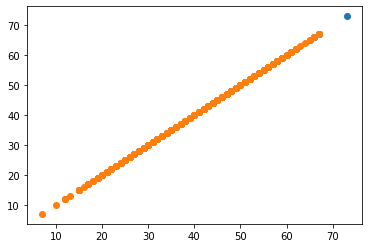

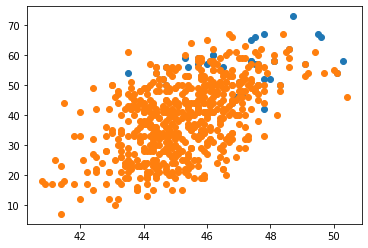

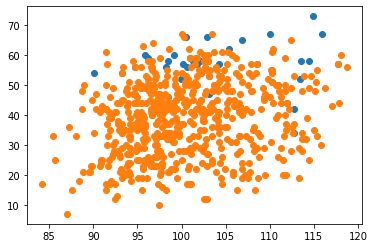

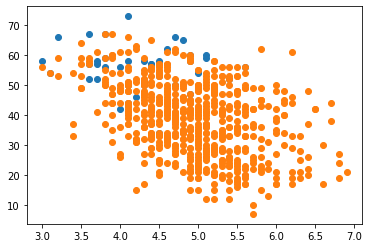

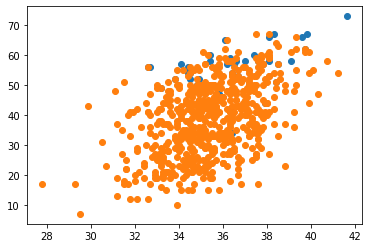

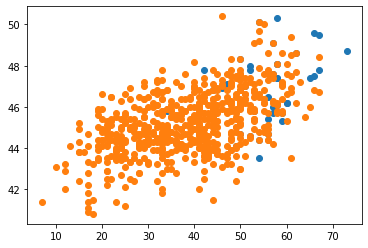

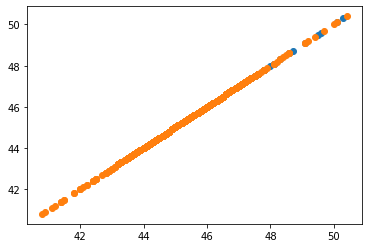

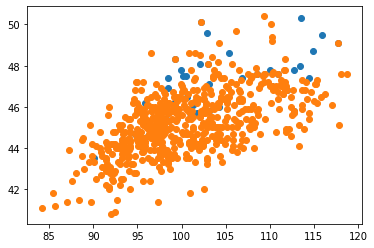

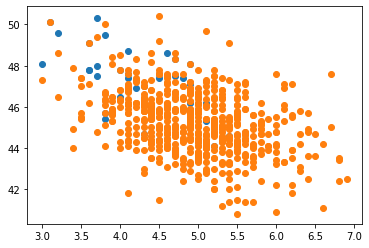

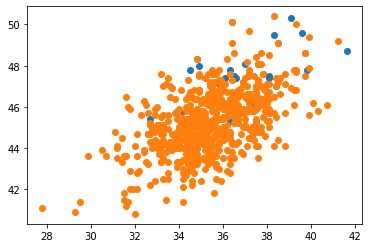

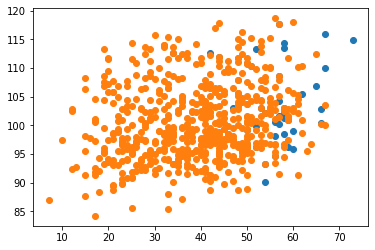

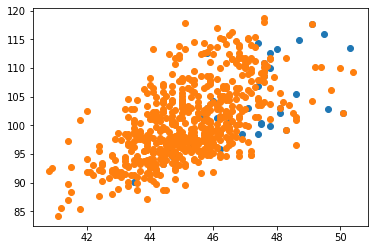

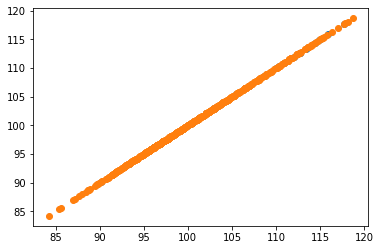

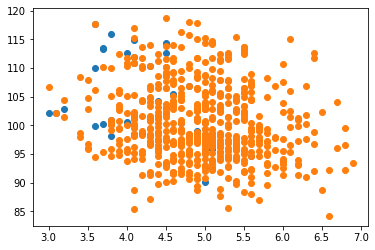

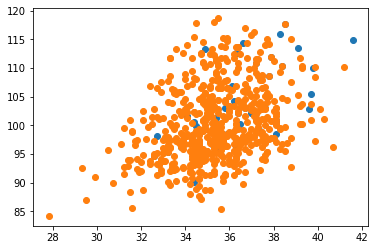

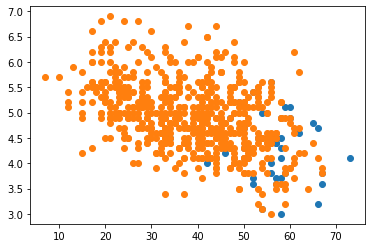

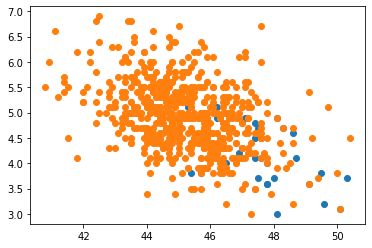

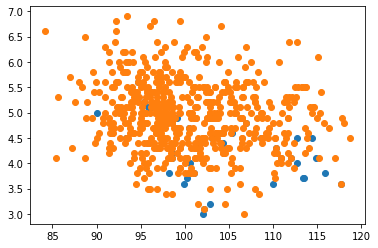

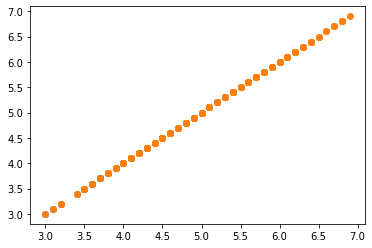

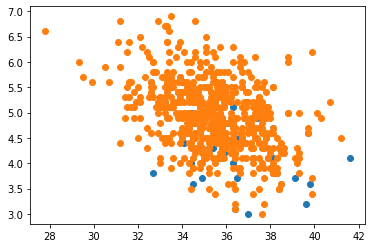

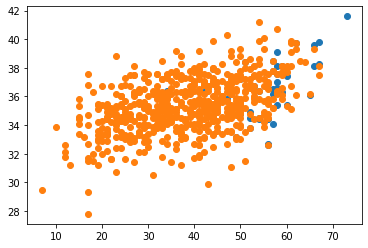

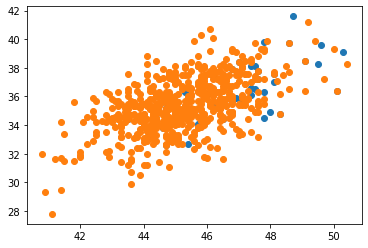

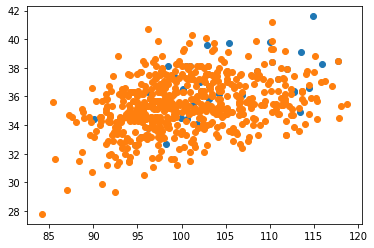

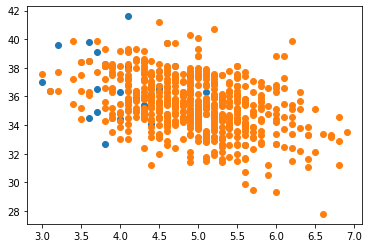

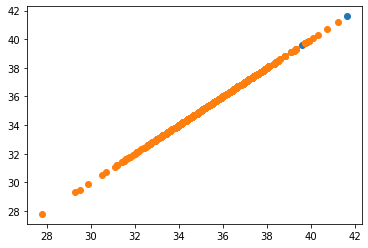

In [16]:
lst1 = ['W', 'FG%', 'PTS', 'BLKA', '3P%']
lst2 = ['W', 'FG%', 'PTS', 'BLKA', '3P%']
ind = 0
#make a plot of the separted data based on if the team made the championship for each important stat, then compare
for item in lst1:
    
    for num in range(len(lst2)):
        plt.figure()
        plt.scatter(championshipdf[lst1[num]], championshipdf[item])
        plt.scatter(team_stats_all_time[lst1[num]], team_stats_all_time[item])
    

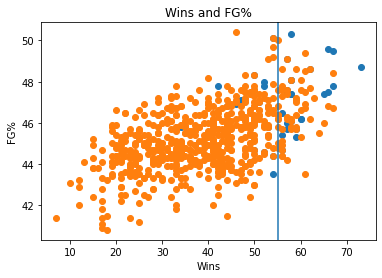

In [17]:
#replot the important stats and separate based on different data points, redo this for each major stat
plt.scatter(championshipdf['W'], championshipdf['FG%'])
plt.scatter(team_stats_all_time['W'], team_stats_all_time['FG%'])
plt.title('Wins and FG%')
plt.xlabel('Wins')
plt.ylabel('FG%')
plt.axvline(55)

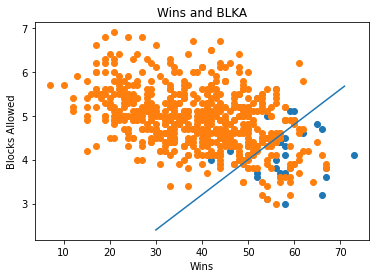

In [18]:
plt.scatter(championshipdf['W'], championshipdf['BLKA'])
plt.scatter(team_stats_all_time['W'], team_stats_all_time['BLKA'])
plt.title('Wins and BLKA')
plt.xlabel('Wins')
plt.ylabel('Blocks Allowed')
x = np.arange(30, 71,.1)
y = (2/25)*x
plt.plot(x,y)

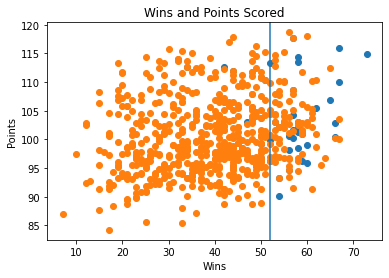

In [19]:
plt.scatter(championshipdf['W'], championshipdf['PTS'])
plt.scatter(team_stats_all_time['W'], team_stats_all_time['PTS'])
plt.title('Wins and Points Scored')
plt.xlabel('Wins')
plt.ylabel('Points')
plt.axvline(52)

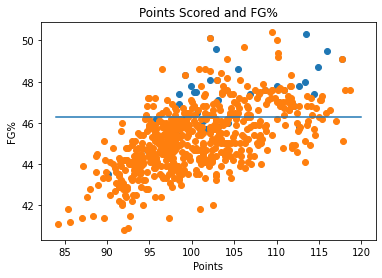

In [20]:
plt.scatter(championshipdf['PTS'], championshipdf['FG%'])
plt.scatter(team_stats_all_time['PTS'], team_stats_all_time['FG%'])
plt.title('Points Scored and FG%')
plt.xlabel('Points')
plt.ylabel('FG%')
x = np.arange(84, 120,.1)
y = 46.3 + (0)*x
plt.plot(x,y)

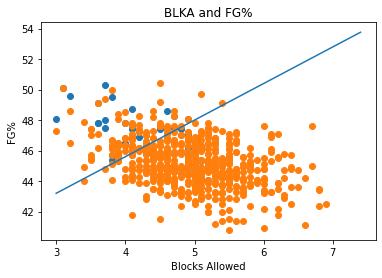

In [21]:
plt.scatter(championshipdf['BLKA'], championshipdf['FG%'])
plt.scatter(team_stats_all_time['BLKA'], team_stats_all_time['FG%'])
plt.title('BLKA and FG%')
plt.xlabel('Blocks Allowed')
plt.ylabel('FG%')
x = np.arange(3, 7.5,.1)
y = 36 + (6/2.5)*x
plt.plot(x,y)

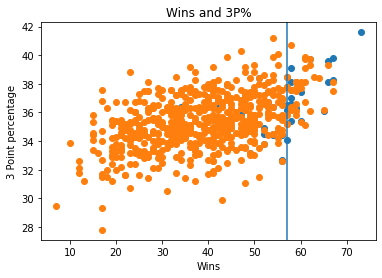

In [22]:
plt.scatter(championshipdf['W'], championshipdf['3P%'])
plt.scatter(team_stats_all_time['W'], team_stats_all_time['3P%'])
plt.title('Wins and 3P%')
plt.xlabel('Wins')
plt.ylabel('3 Point percentage')
plt.axvline(57)

In [23]:
current_seaso = pd.read_csv("Current Season Data.csv")
current_seasons = current_seaso.drop("Unnamed: 6", axis='columns')
current_seasons
current_season = current_seasons.set_index("team")
current_seasons

team   W    pts   FG%   3p%  BLKA
0      Milwaukee  58  116.9  47.3  36.8   3.9
1          Miami  44  109.5  46.0  34.4   3.8
2      Cleveland  51  112.3  48.8  36.7   4.4
3       New York  47  116.0  47.0  35.4   4.1
4   Philadelphia  54  115.2  48.7  38.7   4.6
5        Booklyn  45  116.0  48.7  37.8   3.9
6         Boston  57  117.9  47.5  37.7   3.9
7        Atlanta  41  118.4  48.3  35.2   5.0
8         Denver  53  115.8  50.4  37.9   4.2
9      Minnesota  42  114.4  48.0  36.4   4.1
10       Phoenix  45  113.6  46.7  37.7   4.0
11        LAClip  44  113.6  47.7  38.1   4.2
12    Sacramento  48  120.7  49.4  36.9   4.2
13  Golden State  44  118.9  47.9  38.5   4.0
14       Memphis  51  116.9  47.5  35.1   5.2
15     LA Lakers  43  117.2  48.2  34.6   5.1

In [24]:
current_seasons["team"][0]

'Milwaukee'

In [25]:
current_season.loc["Milwaukee"]["FG%"]

47.3

In [26]:
def plot(teamtop, teambot):  
    plt.figure(figsize=(8, 8))
    plt.suptitle('{} vs {}'.format(teamtop,teambot))
    
    plt.subplot(2, 2, 1)
    plt.title('Wins and FG%')
    plt.scatter(current_season.loc[teamtop]["W"],current_season.loc[teamtop]["FG%"], label = "{}".format(teamtop))
    plt.scatter(current_season.loc[teambot]["W"],current_season.loc[teambot]["FG%"], label = "{}".format(teambot))
    plt.xlabel('Wins')
    plt.ylabel('FG%')
    plt.axvline(55)
    plt.legend()

    plt.subplot(2,2,2)
    plt.title('Wins and BLKA')
    plt.xlabel('Wins')
    plt.ylabel('Blocks Allowed')
    x = np.arange(30, 71,.1)
    y = (2/25)*x
    plt.plot(x,y)
    plt.scatter(current_season.loc[teamtop]["W"],current_season.loc[teamtop]["BLKA"], label = "{}".format(teamtop))
    plt.scatter(current_season.loc[teambot]["W"],current_season.loc[teambot]["BLKA"], label = "{}".format(teambot))
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.title('Wins and Points Scored')
    plt.xlabel('Wins')
    plt.ylabel('Points')
    plt.axvline(52)
    plt.scatter(current_season.loc[teamtop]["W"],current_season.loc[teamtop]["pts"], label = "{}".format(teamtop))
    plt.scatter(current_season.loc[teambot]["W"],current_season.loc[teambot]["pts"], label = "{}".format(teambot))
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Wins and 3P%')
    plt.xlabel('Wins')
    plt.ylabel('3 Point percentage')
    plt.axvline(57)
    plt.scatter(current_season.loc[teamtop]["W"],current_season.loc[teamtop]["3p%"], label = "{}".format(teamtop))
    plt.scatter(current_season.loc[teambot]["W"],current_season.loc[teambot]["3p%"], label = "{}".format(teambot))
    plt.legend()
    plt.tight_layout()
    plt.savefig("{} vs {}".format(teamtop,teambot))

   

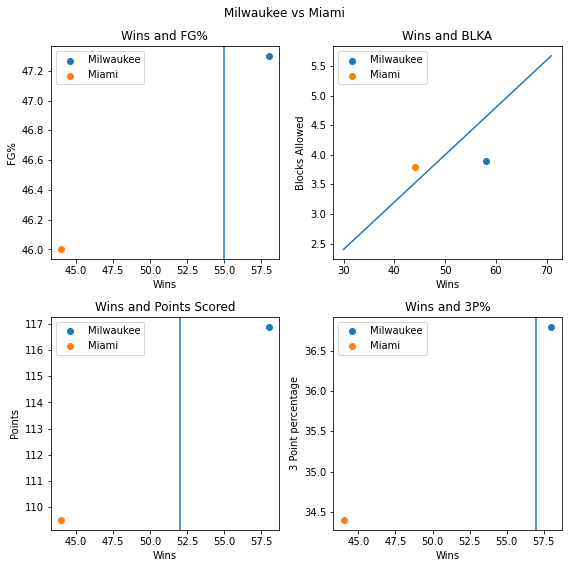

In [27]:
plot(current_seasons["team"][0],current_seasons["team"][1])


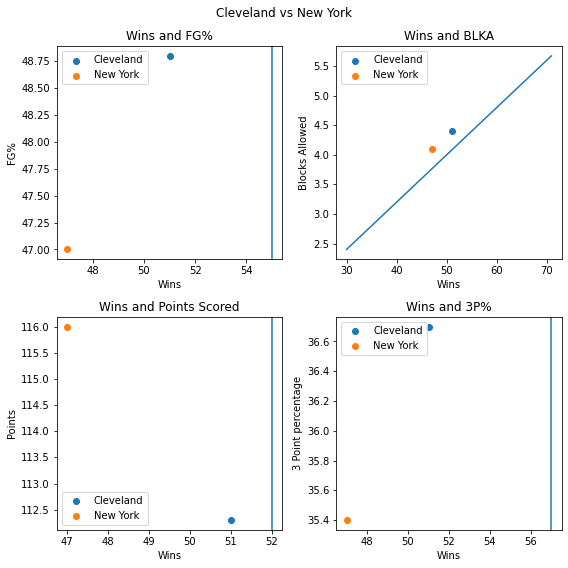

In [28]:
plot(current_seasons["team"][2],current_seasons["team"][3])

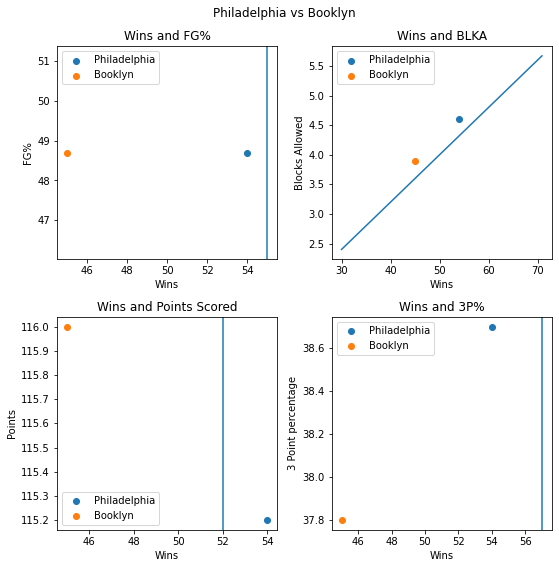

In [29]:
plot(current_seasons["team"][4],current_seasons["team"][5])

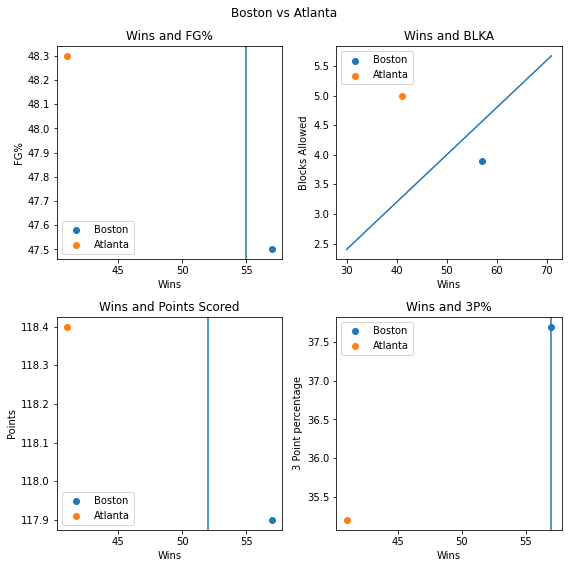

In [30]:
plot(current_seasons["team"][6],current_seasons["team"][7])

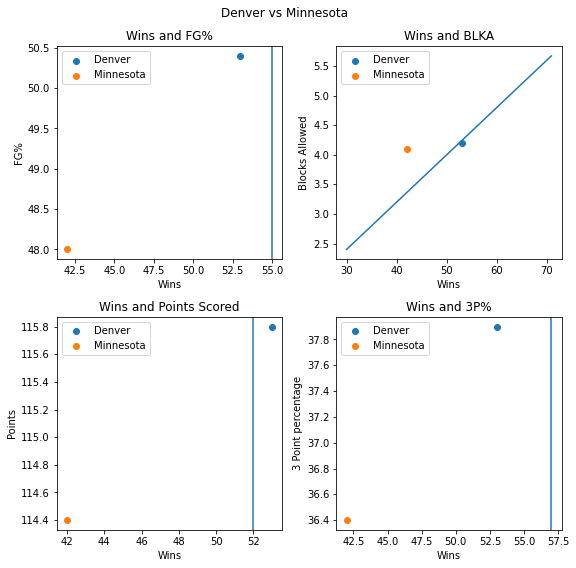

In [31]:
plot(current_seasons["team"][8],current_seasons["team"][9])

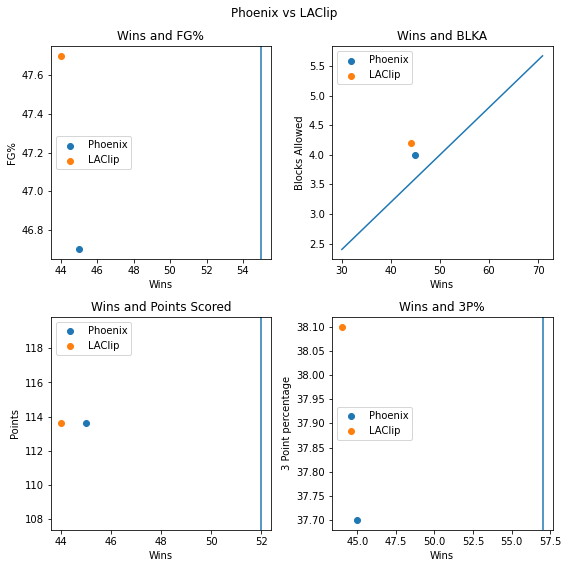

In [32]:
plot(current_seasons["team"][10],current_seasons["team"][11])

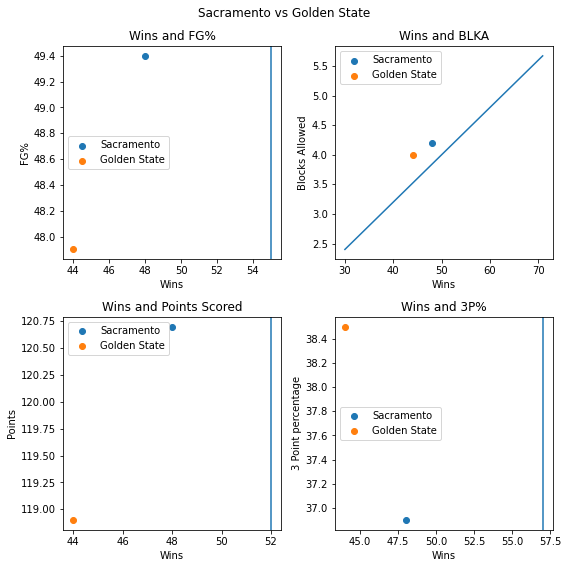

In [33]:
plot(current_seasons["team"][12],current_seasons["team"][13])

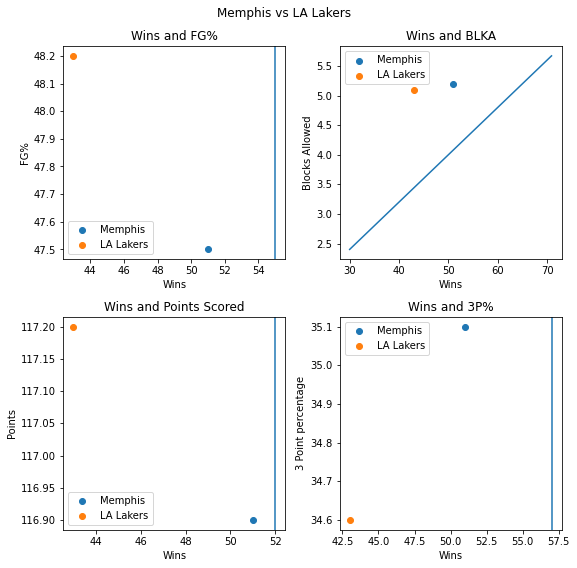

In [34]:
plot(current_seasons["team"][14],current_seasons["team"][15])

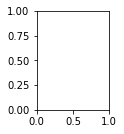

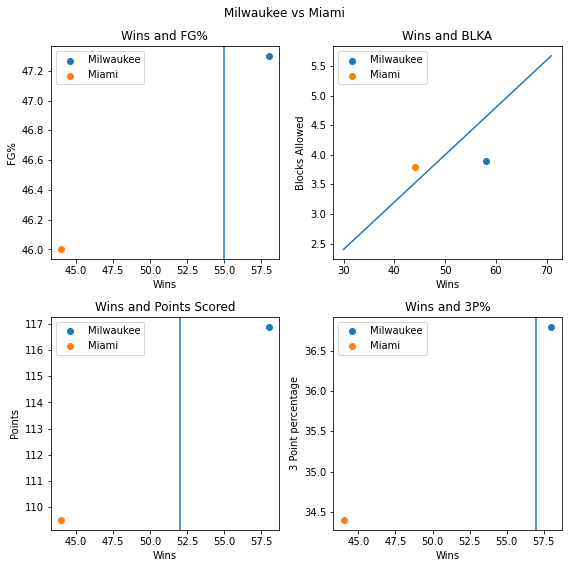

In [35]:
plt.subplot(2,4,1)
plot(current_seasons["team"][0],current_seasons["team"][1])
#plt.subplot(2,4,2)
#plot(current_seasons["team"][2],current_seasons["team"][3])
#    plt.subplot(2,4,3)
#    plot(current_seasons["team"][4],current_seasons["team"][5])
#    plt.subplot(2,4,4)
#    plot(current_seasons["team"][6],current_seasons["team"][7])
#    plt.subplot(2,4,5)
#    plot(current_seasons["team"][8],current_seasons["team"][9])
#    plt.subplot(2,4,6)
#    plot(current_seasons["team"][10],current_seasons["team"][11])
#    plt.subplot(2,4,7)
#    plot(current_seasons["team"][12],current_seasons["team"][13])
#    plt.subplot(2,4,8)
#    plot(current_seasons["team"][14],current_seasons["team"][15])

#]

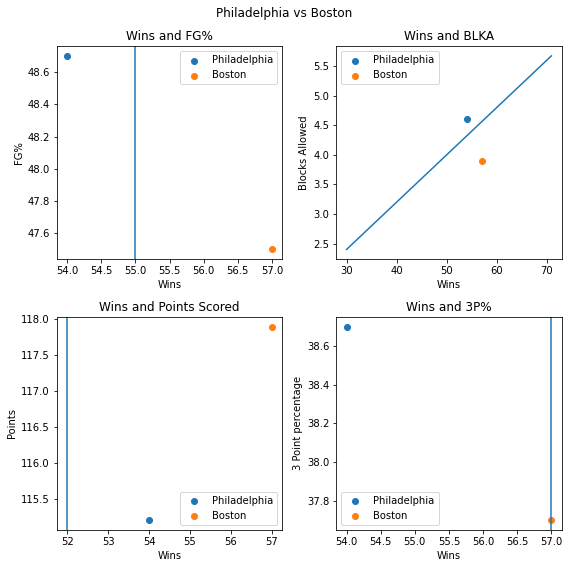

In [36]:
plot(current_seasons["team"][4],current_seasons["team"][6])


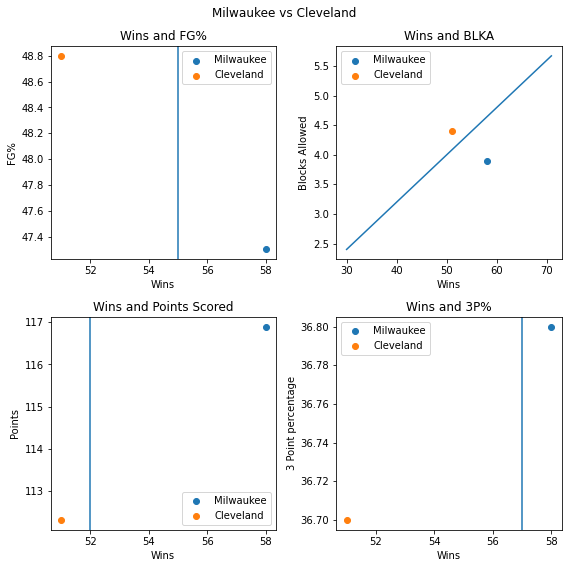

In [37]:
plot(current_seasons["team"][0],current_seasons["team"][2])


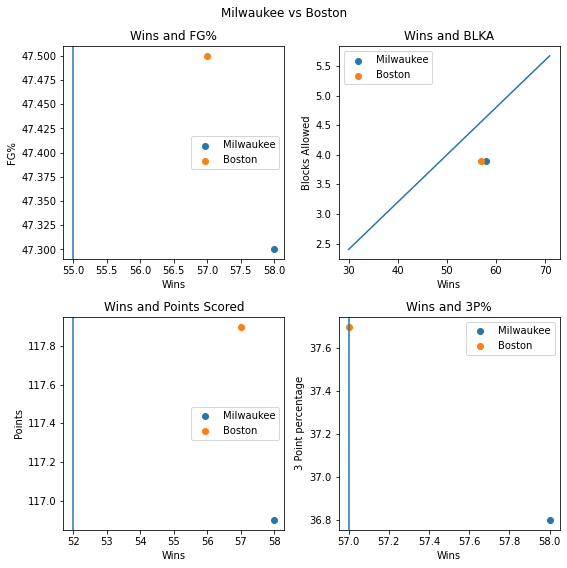

In [38]:
plot(current_seasons["team"][0],current_seasons["team"][6])


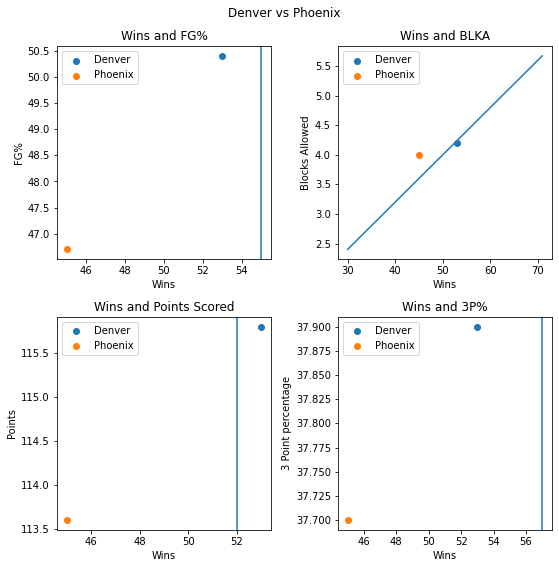

In [39]:
plot(current_seasons["team"][8],current_seasons["team"][10])

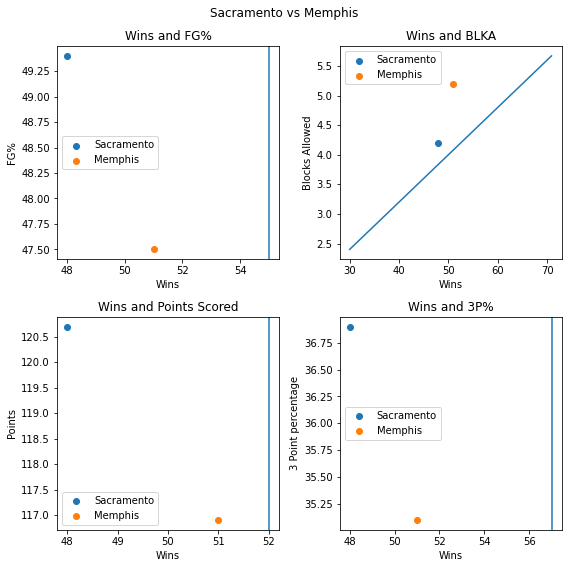

In [40]:
plot(current_seasons["team"][12],current_seasons["team"][14])

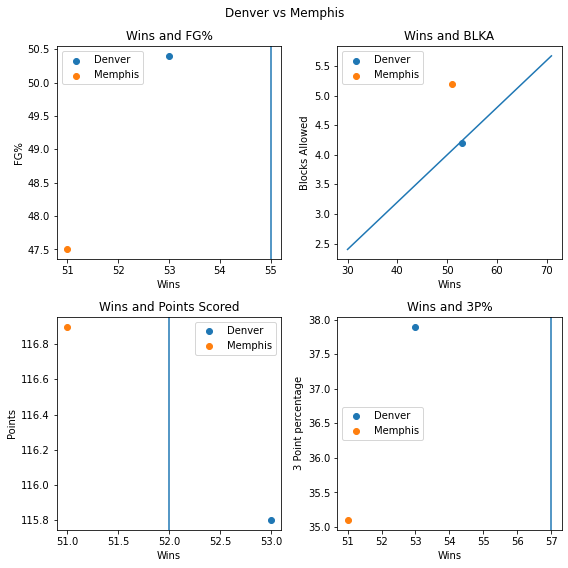

In [41]:
plot(current_seasons["team"][8],current_seasons["team"][14])

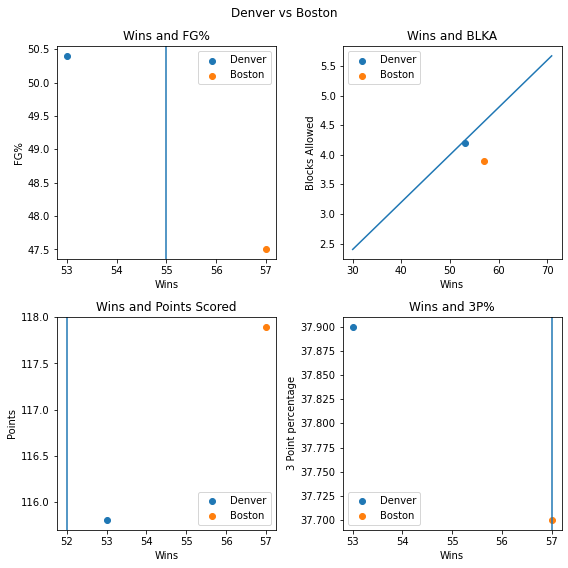

In [42]:
plot(current_seasons["team"][8],current_seasons["team"][6])
